In [1]:
from matipo import SEQUENCE_DIR, GLOBALS_DIR
from matipo.sequence import Sequence
from matipo.util.autophase import autophase
from matipo.util.fft import get_freq_spectrum
import numpy as np
import matplotlib.pyplot as plt

# set matplotlib figure size, default is quite small
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 100

# progress_handler for Sequence.run() that simply prints the progress
def print_progress(p, l):
    print(p, '/', l)

# load FID pulse sequence
seq = Sequence(SEQUENCE_DIR+'FID.py')

In [2]:
# load relevant global variables
seq.loadpar(GLOBALS_DIR+'frequency.yaml')
seq.loadpar(GLOBALS_DIR+'hardpulse_90.yaml')
seq.loadpar(GLOBALS_DIR+'shims.yaml')

# set some parameters directly (SI units)
seq.setpar(
    n_scans=4,
    n_samples=50000,
    t_dw=0.5e-6,
    t_acqdelay=50e-6,
    t_end=0.5,
)

# print out the parameter set for reference
print(seq.par)

# run sequence, progress_handler is optional
y = await seq.run(progress_handler=print_progress)

ParameterSet(n_scans=4, f=15089547.419315256, a_90=0.34987021061682183, t_90=3.2e-05, bw_90=0.0, t_acqdelay=5e-05, t_dw=5e-07, n_samples=50000, t_end=0.5, shim_x=0.22946196224654097, shim_y=0.20694016858525605, shim_z=-0.5266442602004828, shim_z2=-0.18704360002659268, shim_zx=-0.6006874142351788, shim_zy=0.07567322769817048, shim_xy=0.015376149434010347, shim_x2y2=0.31943003296871364)
1 / 4
2 / 4
3 / 4
4 / 4


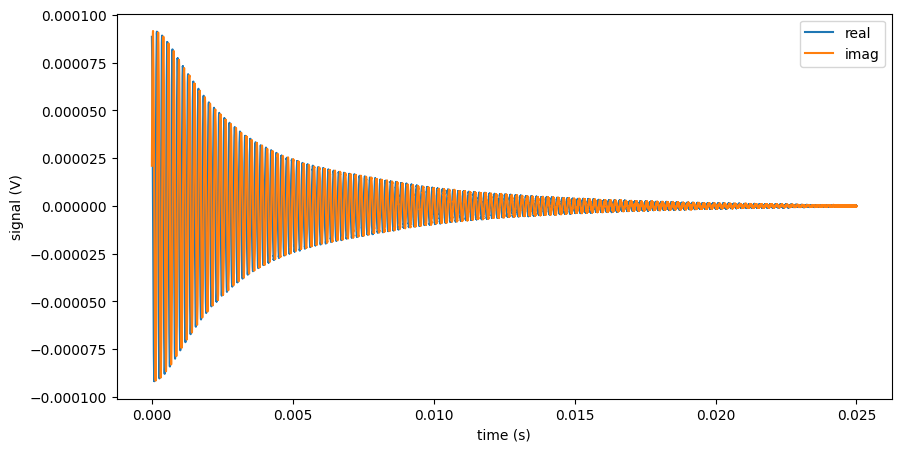

In [3]:
y = autophase(seq.data)
t = np.linspace(0, seq.par.n_samples*seq.par.t_dw, seq.par.n_samples)

plt.plot(t, y.real, label='real')
plt.plot(t, y.imag, label='imag')
plt.ylabel('signal (V)')
plt.xlabel('time (s)')
plt.legend()
plt.show()

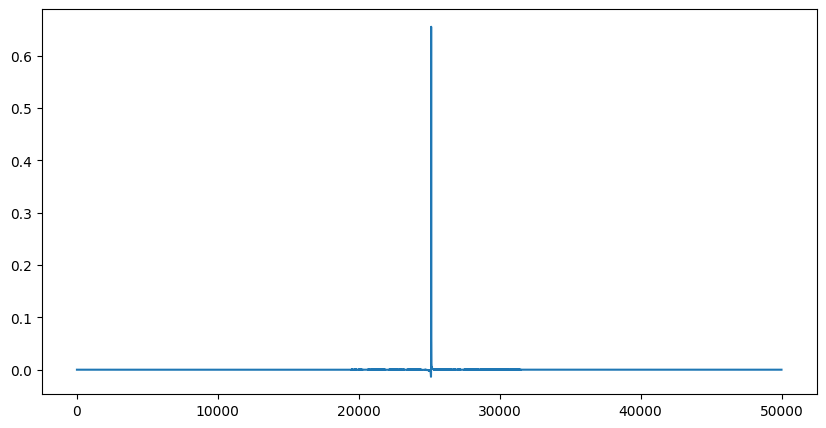

In [5]:
fft = np.fft.fftshift(np.fft.fft(y))

plt.plot(fft.real)
plt.show()